In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Notebook to investigate the performance of spike interface in localizing neurons 

In [2]:
import MEArec as mr # what we will use to create a synthetic recording
import spikeinterface.full as si  # what we will use to sort the spikes

import warnings
from probeinterface.plotting import plot_probe
from matplotlib import cm
from probeinterface import read_prb

import time
import numpy as np

job_kwargs = {'n_jobs' : -1, 'chunk_memory' : '10M', 'verbose': True, 'progress_bar': True}

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [3]:
rec = mr.load_recordings('recordings.h5')
positions = np.hstack((rec.template_locations[:, 1:3], rec.template_locations[:, 0][:, np.newaxis]))

from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_positions
recording, gt_sorting = si.read_mearec('recordings.h5')
recording_f = si.bandpass_filter(recording)
recording_f = si.common_reference(recording_f)
recording_f = si.zscore(recording_f)

In [8]:
benchmarks = []
waveforms = None
for method in ['center_of_mass', 'monopolar_triangulation', 'grid_convolution']:
    if method == 'center_of_mass':
        for feature in ['ptp', 'energy', 'peak_voltage']:
            title = f'CoM ({feature})'
            params = {'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'monopolar_triangulation':
        for feature in ['ptp', 'energy', 'peak_voltage']:
            title = f'Monopolar ({feature})'
            params = {'enforce_decrease': True, 'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'grid_convolution':
        title = 'Grid'
        params = {}
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks.append(bench)
    
    

Exception ignored in: <function BenchmarkPeakLocalization.__del__ at 0x7f01671c45e0>
Traceback (most recent call last):
  File "/home/pierre/github/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py", line 47, in __del__
    shutil.rmtree(self.tmp_folder)
  File "/home/pierre/anaconda3/envs/si/lib/python3.9/shutil.py", line 724, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/home/pierre/anaconda3/envs/si/lib/python3.9/shutil.py", line 722, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: './CV03K3B3'
Exception ignored in: <function BenchmarkPeakLocalization.__del__ at 0x7f01671c45e0>
Traceback (most recent call last):
  File "/home/pierre/github/spikeinterface/src/spikeinterface/sortingcomponents/benchmark/benchmark_peak_localization.py", line 47, in __del__
    shutil.rmtree(self.tmp_folder)
  File "/home/pierre/anaconda3/envs/si/lib/python3.9/shutil.py", line 724, in rmtree
    one

extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

GridSpec(4, 3)


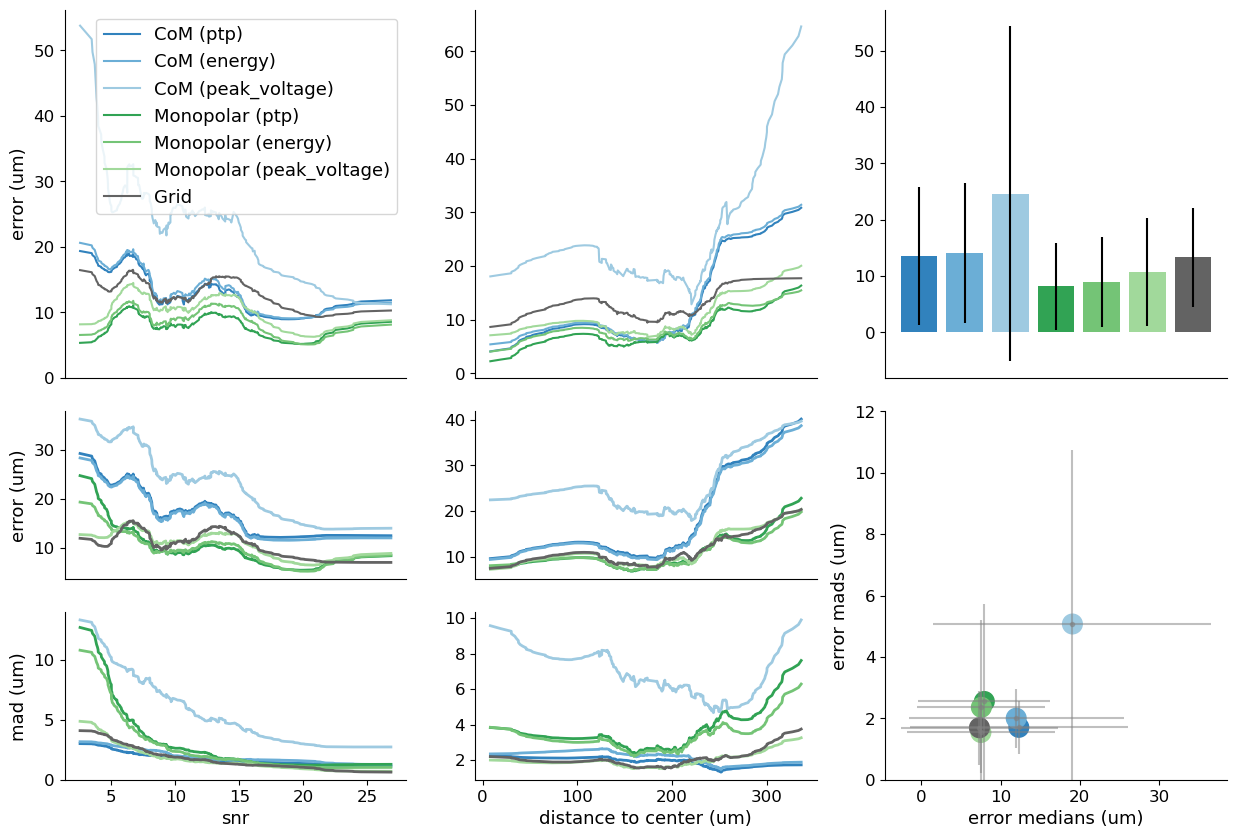

In [10]:
colors = {}

import matplotlib as mpl

cmap = mpl.cm.tab20c
norm = mpl.colors.Normalize(vmin=0, vmax=1)



for value, bench in zip([0,0.05,0.1,0.4,0.45,0.5,0.8], benchmarks):    
    colors[bench.title] = mpl.cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(value)
    
plot_comparison_positions(benchmarks, colors=colors)
import pylab as plt
plt.savefig('comparison.pdf')

ZScoreRecording: 256 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s - float32 dtype 
                 312.50 MiB
extract waveforms shared_memory with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms shared_memory with n_jobs = 72 and chunk_size = 9765


extract waveforms shared_memory:   0%|          | 0/33 [00:00<?, ?it/s]

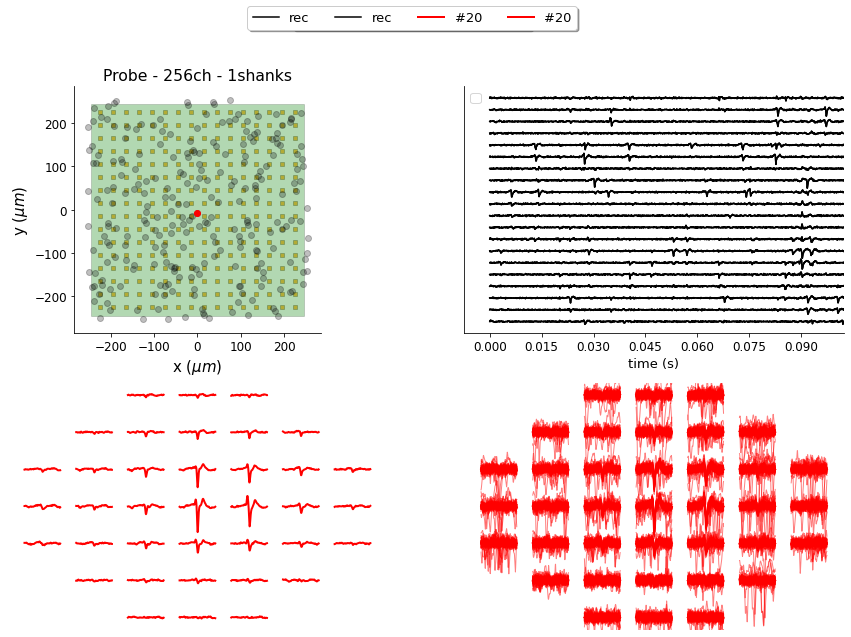

In [182]:
plot_figure_1(benchmarks[0])
plt.savefig('illustation_bis.pdf')

In [179]:
plt.savefig('illustation.pdf')

<Figure size 432x288 with 0 Axes>

In [11]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_figure_1

In [12]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import plot_comparison_precision

In [13]:
benchmarks_ms = {}
waveforms = None
xaxis = [0.25, 0.5, 0.75, 1, 1.25, 1.5]
benchmarks_ms['xaxis'] = xaxis

for method in ['monopolar_triangulation', 'center_of_mass', 'grid_convolution']:
    for t_range in xaxis:
        if method == 'monopolar_triangulation':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'Monopolar ({feature})'
                params = {'enforce_decrease': True, 'ms_before' : t_range, 'ms_after' : t_range, 'feature' : feature}
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_ms:
                    benchmarks_ms[title] += [bench]
                else:
                    benchmarks_ms[title] = [bench]
        elif method == 'center_of_mass':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                params = {'ms_before' : t_range, 'ms_after' : t_range, 'feature' : feature}
                title = f'CoM ({feature})'
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_ms:
                    benchmarks_ms[title] += [bench]
                else:
                    benchmarks_ms[title] = [bench]
        elif method == 'grid_convolution':
            params = {'ms_before' : t_range, 'ms_after' : t_range}
            title = f'Grid'
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms    
            bench.run(method, params)
            waveforms = bench.waveforms
            if title in benchmarks_ms:
                benchmarks_ms[title] += [bench]
            else:
                benchmarks_ms[title] = [bench]



extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

In [15]:
benchmarks_radius = {}
waveforms = None
xaxis = [25, 50, 75, 100, 125, 150]
benchmarks_radius['xaxis'] = xaxis 

for method in ['monopolar_triangulation', 'center_of_mass', 'grid_convolution']:
    for r_range in xaxis:
        if method == 'monopolar_triangulation':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'Monopolar ({feature})'
                params = {'enforce_decrease': True, 'radius_um' : r_range, 'feature' : feature}
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_radius:
                    benchmarks_radius[title] += [bench]
                else:
                    benchmarks_radius[title] = [bench]
        elif method == 'center_of_mass':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                params = {'radius_um' : r_range, 'feature' : feature}
                title = f'CoM ({feature})'
                bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_radius:
                    benchmarks_radius[title] += [bench]
                else:
                    benchmarks_radius[title] = [bench]
        elif method == 'grid_convolution':
            params = {'radius_um' : r_range}
            title = f'Grid'
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms    
            bench.run(method, params)
            waveforms = bench.waveforms
            if title in benchmarks_radius:
                benchmarks_radius[title] += [bench]
            else:
                benchmarks_radius[title] = [bench]
    

extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/home/pierre/anaconda3/envs/si/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/home/pierre/anaconda3/envs/si/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/home/pierre/anaconda3/envs/si/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

/home/pierre/anaconda3/envs/si/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [16]:
recordings = {}

xaxis = [100, 300, 500, 700, 900]

for cut_off in xaxis :
    recordings[cut_off] = si.bandpass_filter(recording, freq_min=cut_off)
    recordings[cut_off] = si.common_reference(recordings[cut_off])
    recordings[cut_off] = si.zscore(recordings[cut_off])

In [17]:
benchmarks_cutoff = {}

benchmarks_cutoff['xaxis'] = xaxis 

for cut_off in xaxis:
    waveforms = None
    for method in ['monopolar_triangulation', 'center_of_mass', 'grid_convolution']:
    
        if method == 'monopolar_triangulation':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'Monopolar ({feature})'
                params = {'enforce_decrease': True, 'feature' : feature}
                bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_cutoff:
                    benchmarks_cutoff[title] += [bench]
                else:
                    benchmarks_cutoff[title] = [bench]
        elif method == 'center_of_mass':
            for feature in ['ptp', 'energy', 'peak_voltage']:
                title = f'CoM ({feature})'
                params = {'feature' : feature}
                bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
                if waveforms is not None:
                    bench.waveforms = waveforms    
                bench.run(method, params)
                waveforms = bench.waveforms
                if title in benchmarks_cutoff:
                    benchmarks_cutoff[title] += [bench]
                else:
                    benchmarks_cutoff[title] = [bench]
        elif method == 'grid_convolution':
            title = f'Grid'
            params = {}
            bench = BenchmarkPeakLocalization(recordings[cut_off], gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms    
            bench.run(method, params)
            waveforms = bench.waveforms
            if title in benchmarks_cutoff:
                benchmarks_cutoff[title] += [bench]
            else:
                benchmarks_cutoff[title] = [bench]

extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

extract waveforms memmap with n_jobs = 20 and chunk_size = 9765


extract waveforms memmap:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using monopolar_triangulation with n_jobs = 20 and chunk_size = 9765


localize peaks using monopolar_triangulation:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using center_of_mass with n_jobs = 20 and chunk_size = 9765


localize peaks using center_of_mass:   0%|          | 0/33 [00:00<?, ?it/s]

pipeline with n_jobs = 20 and chunk_size = 9765


pipeline:   0%|          | 0/33 [00:00<?, ?it/s]

localize peaks using grid_convolution with n_jobs = 20 and chunk_size = 9765


localize peaks using grid_convolution:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
from spikeinterface.sortingcomponents.benchmark.benchmark_tools import BenchmarkBase, _simpleaxis 
import pylab as plt
import matplotlib


def plot_comparison_precision(benchmarks, cmap='winter'):

    import pylab as plt
    fig, axes = plt.subplots(ncols=2, nrows=len(benchmarks), figsize=(15, 10), squeeze=False)
    
    for icount, benchmark in enumerate(benchmarks):
    
        vrange = np.array(list(benchmark.keys()))
        v_min = np.min(vrange)
        v_max = np.max(vrange)
        
        my_cmap = plt.get_cmap(cmap)
        cNorm  = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
        scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=my_cmap)
        
        for key, bench in benchmark.items():

            spikes = bench.spike_positions[0]
            units = bench.waveforms.sorting.unit_ids
            all_x = np.concatenate([spikes[unit_id]['x'] for unit_id in units])
            all_y = np.concatenate([spikes[unit_id]['y'] for unit_id in units])
            try:
                all_z = np.concatenate([spikes[unit_id]['z'] for unit_id in units])
            except Exception:
                all_z = np.zeros(len(all_x))
                
            gt_positions = bench.gt_positions
            real_x = np.concatenate([gt_positions[c, 0]*np.ones(len(spikes[i]['x'])) for c, i in enumerate(units)])
            real_y = np.concatenate([gt_positions[c, 1]*np.ones(len(spikes[i]['y'])) for c, i in enumerate(units)])
            try:
                real_z = np.concatenate([gt_positions[c, 2]*np.ones(len(spikes[i]['z'])) for c, i in enumerate(units)])
            except Exception:
                real_z = np.zeros(len(real_x))
                
            dx = np.abs(all_x - real_x)
            dy = np.abs(all_y - real_y)
            dz = np.abs(all_z - real_z)
            ax = axes[icount, 0]
            
            colorVal = scalarMap.to_rgba(key)
            
            ax.errorbar(np.arange(3), [dx.mean(), dy.mean(), dz.mean()], 
                        yerr=[dx.std(), dy.std(), dz.std()], label=bench.title, c=colorVal)
        ax.legend()
        ax.set_ylabel('error (um)')
        ax.set_xticks(np.arange(3), ['x', 'y', 'z'])
        _simpleaxis(ax)

        x_means = []
        x_stds = []
        for bench in benchmark.values():
            x_means += [np.mean(bench.medians_over_templates)]
            x_stds += [np.std(bench.medians_over_templates)]

        #ax.set_yticks([])
        #ax.set_ylim(ymin, ymax)

        ax = axes[icount, 1]
        _simpleaxis(ax)

        y_means = []
        y_stds = []
        colors = []
        for key, bench in benchmark.items():
            y_means += [np.mean(bench.mads_over_templates)]
            y_stds += [np.std(bench.mads_over_templates)]
            colors += [scalarMap.to_rgba(key)]

        ax.errorbar(x_means, y_means, xerr=x_stds, yerr=y_stds, fmt='.', c='0.5', alpha=0.5)
        ax.scatter(x_means, y_means, c=colors, s=200)

        ax.set_ylabel('error variances (um)')
        ax.set_xlabel('error means (um)')
      #ax.set_yticks([]
        ymin, ymax = ax.get_ylim()
        #ax.set_ylim(0, 25)
        ax.legend()

In [18]:
from spikeinterface.sortingcomponents.benchmark.benchmark_tools import BenchmarkBase, _simpleaxis 
import pylab as plt
import matplotlib

def plot_comparison_precision_2(benchmarks, colors=None):

    import pylab as plt
    fig, axes = plt.subplots(nrows=3, ncols=len(benchmarks) + 1, figsize=(15, 7), squeeze=False)
    
    to_explore = list(benchmarks_ms.keys())
    to_explore.remove('xaxis')
    
    for title in to_explore:
        
        
        if title.find('Monopolar') > -1:
            jcount = 1
        elif title.find('CoM') > -1:
            jcount = 0
        elif title.find('Grid') > -1:
            jcount = 2
    
        for icount, benchmark in enumerate(benchmarks):

            bench = benchmark[title]
            
            #vrange = np.array(list(bench.keys()))
            #v_min = np.min(vrange)
            #v_max = np.max(vrange)

            #my_cmap = plt.get_cmap(cmaps[jcount])
            #cNorm  = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
            #scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=my_cmap)

            if icount == len(benchmarks) - 1:
                b = bench[0]

                spikes = b.spike_positions[0]
                units = b.waveforms.sorting.unit_ids
                all_x = np.concatenate([spikes[unit_id]['x'] for unit_id in units])
                all_y = np.concatenate([spikes[unit_id]['y'] for unit_id in units])
                try:
                    all_z = np.concatenate([spikes[unit_id]['z'] for unit_id in units])
                except Exception:
                    all_z = np.nan * np.zeros(len(all_x))

                gt_positions = b.gt_positions
                real_x = np.concatenate([gt_positions[c, 0]*np.ones(len(spikes[i]['x'])) for c, i in enumerate(units)])
                real_y = np.concatenate([gt_positions[c, 1]*np.ones(len(spikes[i]['y'])) for c, i in enumerate(units)])
                try:
                    real_z = np.concatenate([gt_positions[c, 2]*np.ones(len(spikes[i]['z'])) for c, i in enumerate(units)])
                except Exception:
                    real_z = np.nan * np.zeros(len(real_x))

                dx = np.abs(all_x - real_x)
                dy = np.abs(all_y - real_y)
                dz = np.abs(all_z - real_z)
                ax = axes[jcount, icount+1]
                
                x_means = np.array([np.nanmean(dx), np.nanmean(dy), np.nanmean(dz)])
                y_means = np.array([np.nanstd(dx), np.nanstd(dy), np.nanstd(dz)])
                
                ax.plot(np.arange(3), x_means, c=colors[title], lw=2)
                ax.fill_between(np.arange(len(x_means)), x_means-y_means,x_means+y_means,
                            color=colors[title], alpha=0.05)
                _simpleaxis(ax)
                
                ax.set_ylabel('error (um)')
                #if jcount == 0:
                ax.set_xticks(np.arange(3), ['x', 'y', 'z'])
                ax.set_ylim(0, 45)
            
            ax = axes[jcount, icount]
            
            _simpleaxis(ax)

            x_means = []
            y_means = []
            y_stds = []
            labels = []
            
            for b in bench:
                x_means += [np.mean(b.medians_over_templates)]
                #x_stds += [np.std(b.medians_over_templates)]
                y_means += [np.mean(b.mads_over_templates)]
                #y_stds += [np.std(b.mads_over_templates)]
                #colors += [scalarMap.to_rgba(key)]
                #label = b.title.replace('Mononopolar', '')
                #label = label.replace('CoM (ptp)', '')
                #label = label.replace('Grid', '')
                #label = label.replace('[', '')
                #label = label.replace(']', '')
                #labels += [label]
                #title = b.title
            xaxis = benchmark['xaxis']
                #ax.scatter(x_means, y_means, c=colors, label=label, s=200, edgecolor='k')
            
            x_means = np.array(x_means)
            y_means = np.array(y_means)
            ax.plot(xaxis, x_means, color=colors[title], lw=2, label=title)
            ax.fill_between(xaxis, x_means-y_means,x_means+y_means,
                            color=colors[title], alpha=0.05)
                
            #ax.errorbar(x_means, y_means, xerr=x_stds, yerr=y_stds, fmt='.', c='0.5', alpha=0.5)
                
    
            #ax.legend(loc='lower right')
            
            if icount == 0:
                ax.set_ylabel('error medians (um)')
            else:
                ax.set_yticks([])
            
            if jcount == 2:
                if icount == 0:
                    ax.set_xlabel('Time (ms)')
                elif icount == 1:
                    ax.set_xlabel('Radius (um)')
                elif icount == 2:
                    ax.set_xlabel('Cutoff (Hz)')
            else:
                ax.set_xticks([])
                #ax.set_xlim(7, 9)
            #    ax.set_xticks([])
            #else:
            #    ax.set_xticks(np.arange(len(labels)), labels, rotation=45)
                #ax.set_xlim(12, 14)
            
            #ymin, ymax = ax.get_ylim()
            
            ax.set_ylim(5, 35)
            #else:
            #    ax.set_ylim(0, 2)
                #ax.set_xlim(5, 20)
            
            #ax.set_title(method)
        axes[jcount, 0].legend()

/tmp/ipykernel_509438/1069357214.py:60: RuntimeWarning: Mean of empty slice
  x_means = np.array([np.nanmean(dx), np.nanmean(dy), np.nanmean(dz)])
/home/pierre/anaconda3/envs/si/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


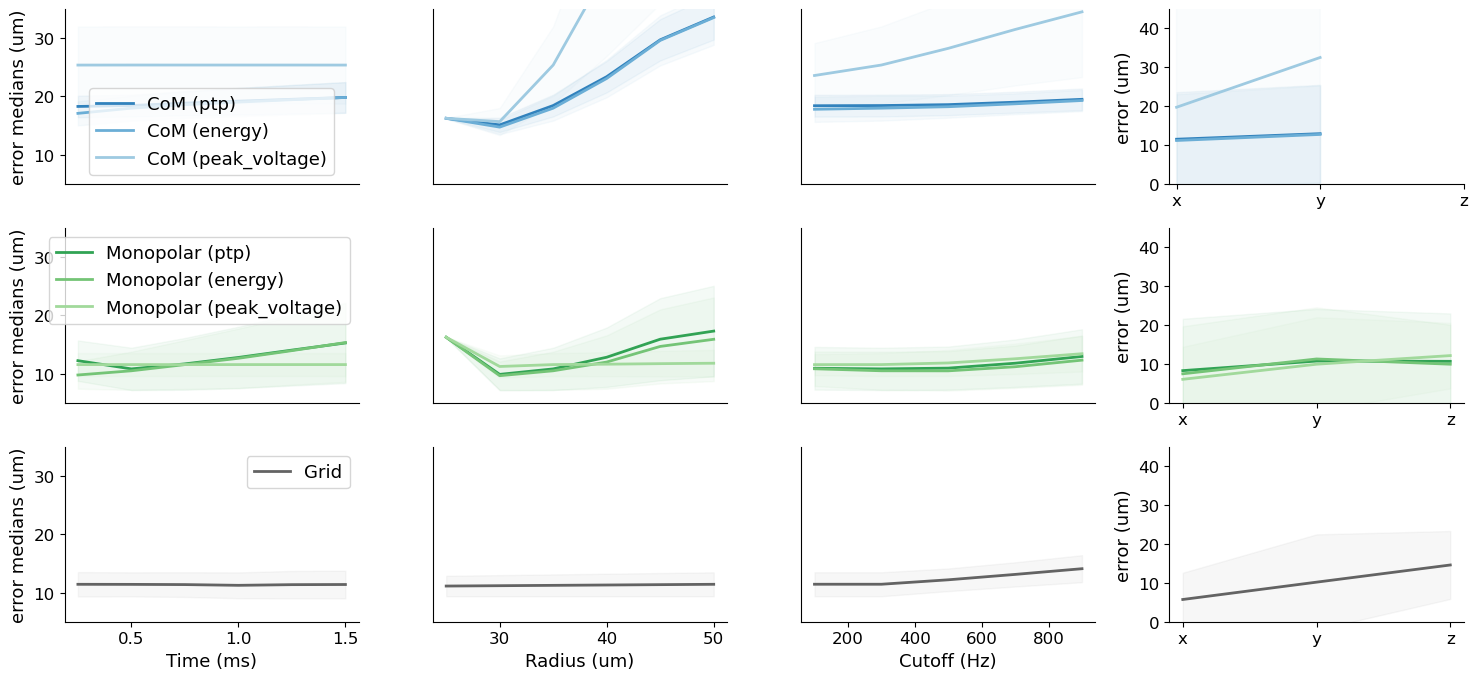

In [19]:
plot_comparison_precision_2([benchmarks_ms, benchmarks_radius, benchmarks_cutoff], colors=colors)
plt.tight_layout()
plt.savefig('influence.pdf')

In [134]:
benchmarks_cutoff['Monopolar (peak_voltage)'] = benchmarks_cutoff.pop('Mononopolar (peak_voltage)')

In [131]:
benchmarks_cutoff.keys()

dict_keys(['xaxis', 'Mononopolar (ptp)', 'Mononopolar (energy)', 'Mononopolar (peak_voltage)', 'CoM (ptp)', 'CoM (energy)', 'CoM (peak_voltage)', 'Grid'])

In [82]:
tmp[0]

'Mononopolar (ptp)'